In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
adata = sc.read("/data/mr423/project/data/3-OLINK_data_train_withOutlier_all.h5ad")
adata_test = sc.read("/data/mr423/project/data/3-OLINK_data_test_withOutlier_all.h5ad")

In [3]:
adata.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044,60-70
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871,60-70
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187,60-70
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758,60-70
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807,50-60
...,...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775,50-60
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548,50-60
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624,60-70


In [4]:
data = pd.read_csv("/data/mr423/project/data/all_train_binned_data.csv")
data_test = pd.read_csv("/data/mr423/project/data/all_test_binned_data.csv")

In [5]:
data=data.set_index('Id')
data_test=data_test.set_index('Id')

In [6]:
data

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2144829,24,80,14,75,86,90,61,10,99,15,...,39,64,2,91,73,82,32,36,4,75
3154285,42,49,23,58,92,99,82,92,95,27,...,58,17,0,87,87,54,38,42,12,70
1679423,65,92,12,44,83,78,56,0,96,14,...,53,52,5,98,64,54,29,41,2,54
1172610,88,53,29,72,83,58,50,95,99,52,...,45,22,1,90,33,75,27,43,99,74
4011532,75,93,29,45,83,78,75,24,90,44,...,30,42,19,95,92,63,10,38,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137580,72,84,21,57,83,76,78,54,98,31,...,36,32,12,97,84,47,19,30,3,44
3378384,70,12,38,52,95,90,83,60,98,25,...,53,7,17,63,25,69,39,42,60,69
1220136,57,73,52,43,94,92,70,84,99,18,...,39,24,3,95,75,78,17,31,30,68


In [7]:
data_test

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4365741,41,9,49,57,93,92,87,72,98,21,...,57,43,6,88,61,81,31,65,77,67
4192150,81,95,15,47,86,65,75,75,99,46,...,42,37,5,96,84,71,25,19,46,51
1847588,46,60,25,51,91,88,87,63,99,20,...,47,44,12,82,64,85,41,51,34,64
2209343,34,47,8,49,91,96,74,97,99,15,...,43,8,7,85,59,69,46,41,40,73
4713095,69,28,47,58,94,88,94,63,98,34,...,48,17,16,61,29,85,46,49,46,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503594,62,73,38,43,95,92,89,2,99,32,...,37,36,6,89,63,66,37,35,19,93
3494250,64,75,35,38,92,73,93,82,98,43,...,47,34,6,90,51,65,13,38,99,60
5746191,52,85,42,55,93,86,95,52,96,23,...,44,26,12,83,88,57,22,41,15,44


In [8]:
# 找出索引的交集和差异
data.index.intersection(data_test.index)

Index([], dtype='int64', name='Id')

In [9]:
y_target = adata.obs['age']
y_test = adata_test.obs['age']

y_test.shape


(4145,)

In [10]:
# scaler = StandardScaler()

# y_train_scaled = scaler.fit_transform(pred.values.reshape(-1, 1)).flatten()
# # y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [10]:
# # 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(data, y_target, test_size=0.2, random_state=233)

In [11]:
# 初始化并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
feature_importances = model.coef_

In [13]:
# 获取特征名称（假设 X_train 是一个 DataFrame）
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

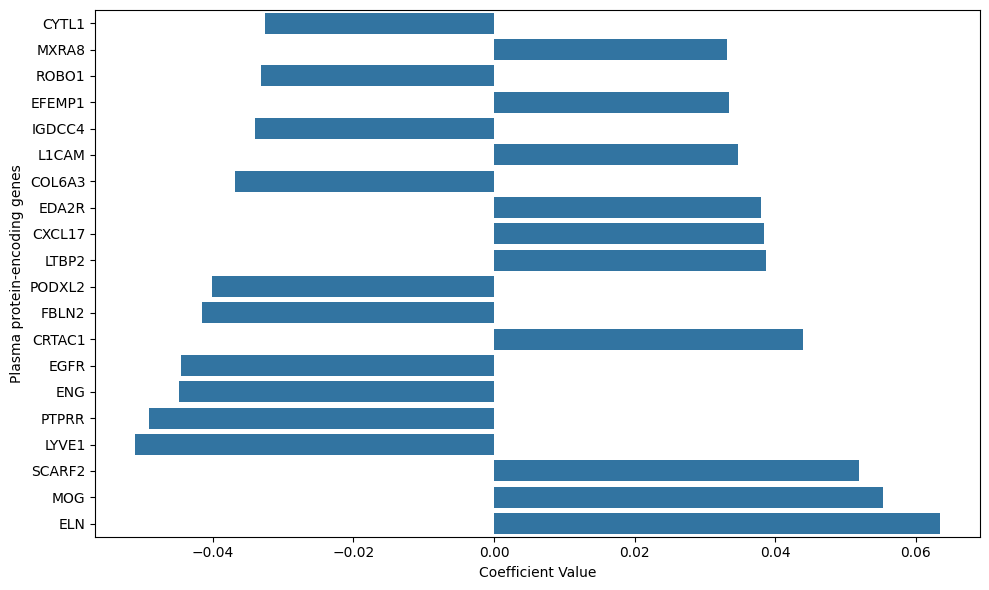

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 找出前20个重要的特征
top_indices = np.argsort(np.abs(feature_importances))[-20:]  # 按绝对值排序，选择最大的20个
top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]

# 可视化前20个重要的特征
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.xlabel("Coefficient Value")
plt.ylabel("Plasma protein-encoding genes")
# plt.title("Top 20 Important Features for Linear Regression Model")
plt.tight_layout()

output_path = "./top_important_genes_lr.png"  # 你可以修改保存路径和文件名
plt.savefig(output_path, dpi=300, bbox_inches="tight")  # dpi 300确保高质量保存，bbox_inches="tight" 去除空白边框

plt.show()

In [18]:
y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

print("train:")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"MAPE: {train_mape:.4f}%")
print(f"R²: {train_r2:.4f}")

train:
MSE: 6.9796
RMSE: 2.6419
MAE: 2.0859
MAPE: 3.7276%
R²: 0.8961


In [19]:
y_val_pred = model.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
val_r2 = r2_score(y_val, y_val_pred)

print("val:")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"MAPE: {val_mape:.4f}%")
print(f"R²: {val_r2:.4f}")

val:
MSE: 8.5842
RMSE: 2.9299
MAE: 2.3232
MAPE: 4.1727%
R²: 0.8715


In [20]:
y_test_pred = model.predict(data_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

print("test:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"MAPE: {test_mape:.4f}%")
print(f"R²: {test_r2:.4f}")

test:
MSE: 8.8971
RMSE: 2.9828
MAE: 2.3595
MAPE: 4.2254%
R²: 0.8648


In [20]:
seeds = [42, 0, 233, 1234, 9999]
# 选择seed = 233
for seed in seeds:
    print(f'seed = {seed}')
    X_train, X_val, y_train, y_val = train_test_split(data, y_target, test_size=0.2, random_state=seed)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    print("train:")
    print(f"MSE: {train_mse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R²: {train_r2:.4f}")



    y_val_pred = model.predict(X_val)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print("val:")
    print(f"MSE: {val_mse:.4f}")
    print(f"MAE: {val_mae:.4f}")
    print(f"R²: {val_r2:.4f}")



    y_test_pred = model.predict(data_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("test:")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R²: {test_r2:.4f}")


seed = 42
train:
MSE: 6.9992
MAE: 2.0902
R²: 0.8956
val:
MSE: 8.4366
MAE: 2.2958
R²: 0.8748
test:
MSE: 8.8049
MAE: 2.3450
R²: 0.8662
seed = 0
train:
MSE: 6.9568
MAE: 2.0809
R²: 0.8967
val:
MSE: 8.6359
MAE: 2.3326
R²: 0.8694
test:
MSE: 8.8581
MAE: 2.3535
R²: 0.8654
seed = 233
train:
MSE: 6.9796
MAE: 2.0859
R²: 0.8961
val:
MSE: 8.5842
MAE: 2.3232
R²: 0.8715
test:
MSE: 8.8971
MAE: 2.3595
R²: 0.8648
seed = 1234
train:
MSE: 6.9935
MAE: 2.0888
R²: 0.8956
val:
MSE: 8.4992
MAE: 2.3122
R²: 0.8745
test:
MSE: 8.7939
MAE: 2.3475
R²: 0.8664
seed = 9999
train:
MSE: 6.9392
MAE: 2.0828
R²: 0.8964
val:
MSE: 8.7136
MAE: 2.3390
R²: 0.8712
test:
MSE: 8.8137
MAE: 2.3478
R²: 0.8661
